<a href="https://colab.research.google.com/github/shihongji/aml-exercise/blob/main/Exercise04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Requirements

Use dataset from [Pima Indians onset of diabetes](https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered) and come up with ML model to identify presence or absence of diabetes retinopathy (DR). Only two outcomes (DR / No_DR), no need to classify 5 different categories as mentioned in the description.
- Visualize results using TensorBoard
- Suggestions to try:
    - Split the data set into 'training data' and 'test data'
    - Change the model design by adding/deleting/modifying the layer(s)
    - Apply data curation techniques, image augmentation, hyperparameter tuning, dropouts, K-fold cross validation, etc.
    - Any other creative thoughts you may have

Tip:
- (1) To download Kaggle data directly to Colab environment, you may follow steps mentioned at [Steps to download Kaggle datasets in Google Colab](https://www.kaggle.com/discussions/general/156610) | Data Science and Machine Learning
- (2) Follow the steps similar to example at [Load and preprocess images](https://www.tensorflow.org/tutorials/load_data/images)  |  TensorFlow Core to organize your dataset into folders and load them from directory directly. Directory names will work as labels.



Submit your notebook with modification (with or without increased accuracy) via Google Colab sharing to instructor and TAs.

## Download the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hongjishi","key":"e5d71221abe7e0329198d5f420bf5832"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pwd

/content


In [ ]:
!kaggle datasets list

ref                                                            title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
lainguyn123/student-performance-factors                        Student Performance Factors                          94KB  2024-09-02 10:53:57          22070        407  1.0              
abdulszz/spotify-most-streamed-songs                           Spotify Most Streamed Songs                          60KB  2024-09-07 18:23:14           7515         94  1.0              
jayavarman/bike-sales-data-of-100k                             Bike Sales Data of 100k                               2MB  2024-09-26 07:50:13           1532         25  0.7058824        
owm4096/laptop-prices                                          La

In [ ]:
!kaggle datasets download -d sovitrath/diabetic-retinopathy-224x224-gaussian-filtered

Dataset URL: https://www.kaggle.com/datasets/sovitrath/diabetic-retinopathy-224x224-gaussian-filtered
License(s): CC0-1.0
100% 426M/427M [00:02<00:00, 203MB/s]
100% 427M/427M [00:02<00:00, 206MB/s]


In [ ]:
!ls
!unzip diabetic-retinopathy-224x224-gaussian-filtered.zip

diabetic-retinopathy-224x224-gaussian-filtered.zip  gdrive  kaggle.json  sample_data
Archive:  diabetic-retinopathy-224x224-gaussian-filtered.zip
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0024cdab0c1e.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/00cb6555d108.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0124dffecf29.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/01b3aed3ed4c.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/0369f3efe69b.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/03e25101e8e8.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/04ac765f91a1.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/059bc89df7f4.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/05a5183c92d0.png  
  inflating: gaussian_filtered_images/gaussian_filtered_images/Mild/068

## Load and Data Process

In [ ]:
import numpy as np
import os
import PIL
import tensorflow as tf
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt
from PIL import Image
from pathlib import Path

In [ ]:
print(tf.__version__)

2.17.0


In [ ]:
data_dir = Path('/content/gaussian_filtered_images/gaussian_filtered_images')
image_count = len(list(data_dir.glob('*/*.png')))
print(image_count)

3662


In [ ]:
image_sum:int = 0
for folder in data_dir.glob('**/'):
    image_count = len(list(folder.glob('*.png')))
    image_sum += image_count
    print(f'{folder.name}: {image_count}')
print(f'Total: {image_sum}')

gaussian_filtered_images: 0
Mild: 370
No_DR: 1805
Severe: 193
Proliferate_DR: 295
Moderate: 999
Total: 3662


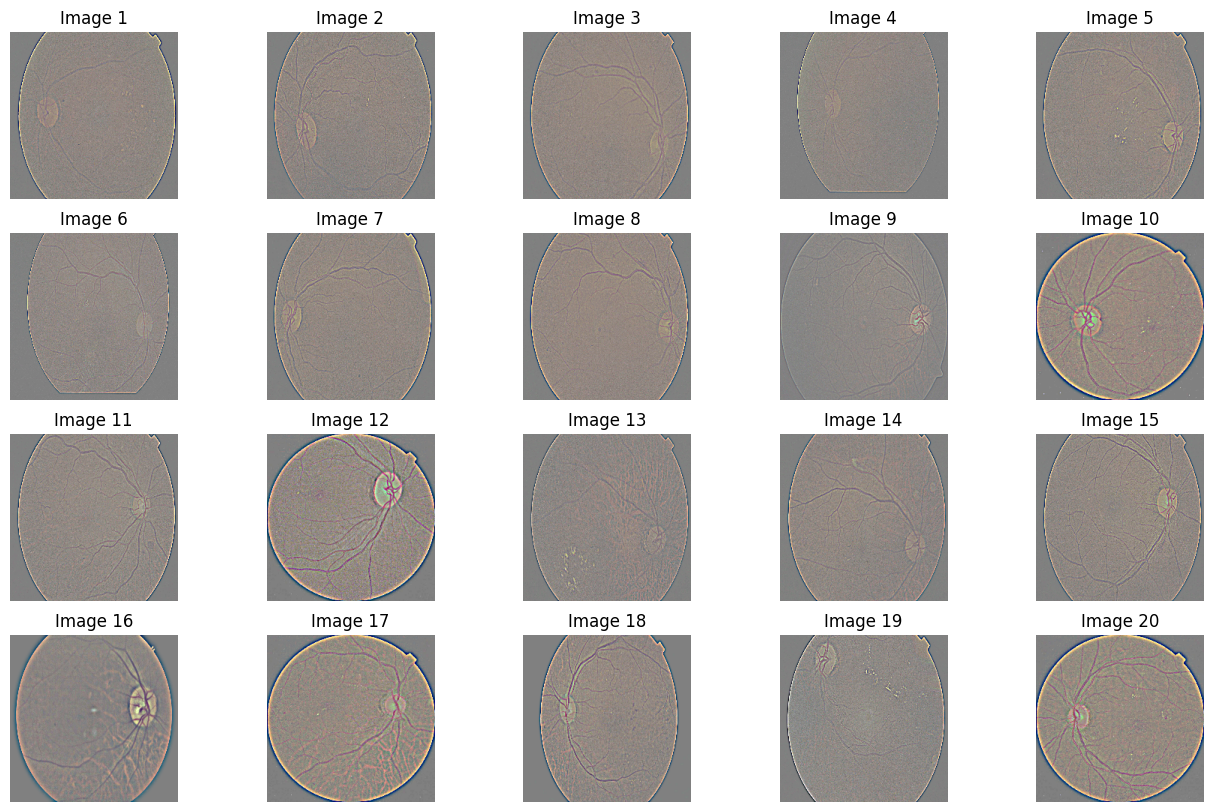

In [ ]:
test_images = list(data_dir.glob('Mild/*'))
plt.figure(figsize=(16, 10))  # Set the figure size

# Open and show the first 5 images
for i in range(20):
    img = Image.open(test_images[i])
    plt.subplot(4, 5, i + 1)  # (rows, columns, position)
    plt.imshow(img)
    plt.axis('off')  # Hide the axis
    plt.title(f"Image {i+1}")  # Set a title for each image)

## Load data using Keras utility